##### In this notebook, we will
 * read in the files
 * compute the jaccard similarities
 * We might have to start small....perhaps just break off a single text, then compare it...
 * The end goal here is to build a dendogram, showing similarities of books...

In [17]:
import pandas as pd
import numpy as np
import os
import gensim
import pickle
from gensim.utils import simple_preprocess
from tqdm.notebook import tqdm
import nltk
from nltk.tokenize import sent_tokenize

from sklearn.feature_extraction.text import TfidfVectorizer


In [2]:
with open('../data/data_tokenized/cf_kv_tokenized.txt', 'rb') as file:
    cf_kv_tokenized = pickle.load(file)

In [3]:
for i in cf_kv_tokenized.keys():
    print(i)

Address of Tatian to the Greeks
Athenagoras the Athenian
Clement of Alexandria Exhortation to the Heathen
Clement of Alexandria The Salvation of the Rich Man
Clement of Alexandria Trilogy
Clement of Alexandria, The Stromata
Dialogue of Justin, Philosopher and Martyr, with Trypho, a Jew
Epistle of Adrian Antoninus and Marcus Aurelius
Epistle of Clement of Rome
False Ignatius
Fragments of Papias
Fragments of the Lost Work of Justin on the Resurrection
Hippolytus of Rome Expository Treatise Against The Jews.
Hippolytus of Rome Treatise On Christ and Antichrist
Hippolytus of Rome
Igantius Syriac Epistles
Ignatius Other
Ireanaus Against Heresies Book III
Ireanaus Fragments from the Lost Writings
Irenaeus Against Heresies Book I
Irenaeus Against Heresies Book II
Irenaeus Against Heresies Book III
Irenaeus Against Heresies Book V
Ireneaus Against Heresies Book IV
Justin's Hortatory Address to the Greeks
Origen
Tertullian
The Didache
The Epistle of Barnabas
The Epistle of Ignatius to Polycarp


In [6]:
#need to return values as a set:

cf_kv_tokenized_set={}

for i,v in cf_kv_tokenized.items():
    dict_value=set(v)
    cf_kv_tokenized_set[i]=dict_value

In [7]:
def jaccard (tok1, tok2):
    return len(tok1.intersection(tok2))/ len(tok1.union(tok2))

In [8]:
dists = np.zeros(shape = (len(cf_kv_tokenized_set), len(cf_kv_tokenized_set)))

In [9]:

for i, doc1 in (enumerate(cf_kv_tokenized_set.keys())):
    for j, doc2 in enumerate(cf_kv_tokenized_set.keys()):
        if i == j:
            dists[i][j]=0
        elif i > j:
            dists[i][j] = dists[j][i]
        else:
            dists[i][j]=1-jaccard(cf_kv_tokenized_set[doc1], cf_kv_tokenized_set[doc2])

In [10]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt

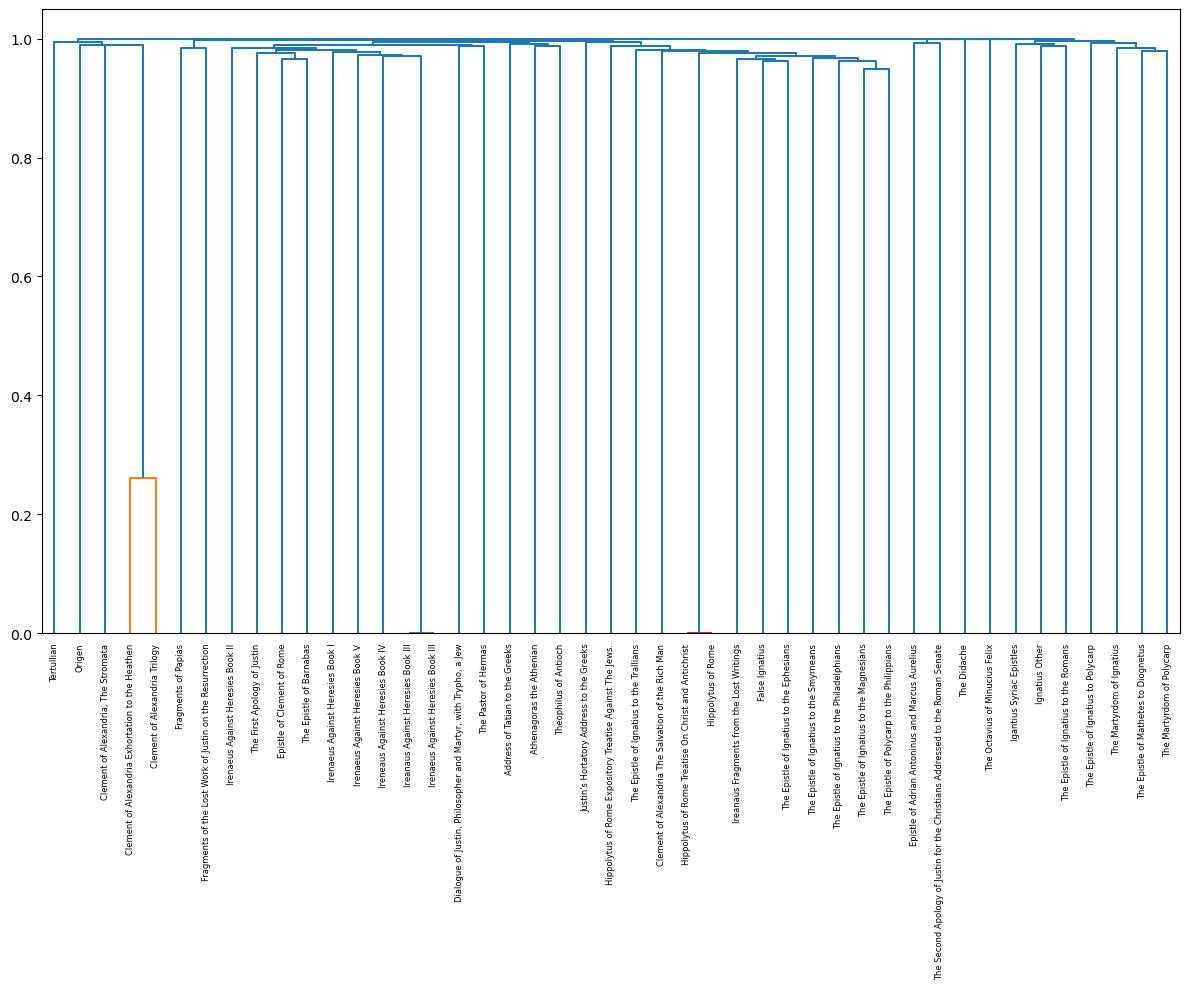

In [14]:
mergings = linkage(squareform(dists), method='complete')

plt.figure(figsize = (12,10))
dendrogram(mergings,
           labels = list(cf_kv_tokenized_set.keys()),
           leaf_rotation = 90,
           leaf_font_size = 6);

plt.tight_layout()
#plt.savefig('images/dendogram_complete_jaccard.png', transparent=False, facecolor='white', dpi = 150);

In [ ]:
#Note the above, that at a sentence level, they seem to be very dissimilar.
#What about at a word level?

In [15]:
with open('../data/cf_kv.txt', 'rb') as file:
    cf_kv_wordlevel = pickle.load(file)

In [20]:
Tfidfvect = TfidfVectorizer()

In [22]:
cf_kv_vectorized = {}

for i,v in cf_kv_wordlevel.items():
    vect=Tfidfvect.fit_transform(v)
    cf_kv_vectorized[i]=vect

ValueError: Iterable over raw text documents expected, string object received.